In [3]:
# Importing the libraries

import pandas as pd   #data preprocessing
import seaborn as sns  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Vehicle dataset from Cardheko. We are going to predict the price of the car based on the given features
# https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/tasks   -- Dataset link

df = pd.read_csv('car data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Checking the shape of the data

df.shape

(301, 9)

In [8]:
# finding out how many unique values are there in the categorical features

print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
# Check missing or null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
# Car_Name column is removed, it is not important

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
final_dataset['Current_Year'] = 2020

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [18]:
# To check how many years old the car is. So, adding new feature for that  

final_dataset['no_year'] = final_dataset['Current_Year']-final_dataset['Year']

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [20]:
# Dropping Year and Current_Year column and putting inplace= True beacuse so that the operation 
# happens inplace like a permanent operation

final_dataset.drop(['Year','Current_Year'], axis = 1, inplace = True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

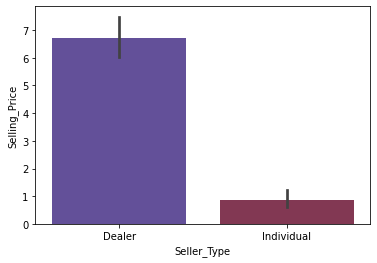

In [22]:
sns.barplot('Seller_Type','Selling_Price',data=final_dataset,palette='twilight')

# Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

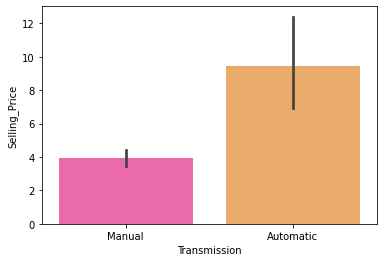

In [23]:
sns.barplot('Transmission','Selling_Price',data=final_dataset,palette='spring')

# It can be observed that Selling Price would be higher for cars that are Automatic.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

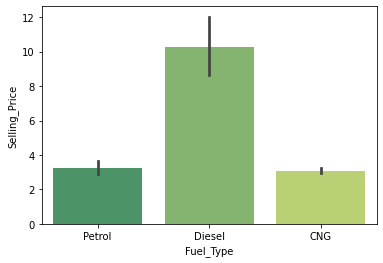

In [24]:
sns.barplot('Fuel_Type','Selling_Price',data=final_dataset,palette='summer')

# Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

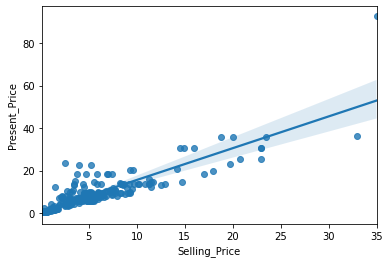

In [25]:
sns.regplot('Selling_Price','Present_Price',data=final_dataset)

# Selling Price tends to increase with increase in the Present Price of cars

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

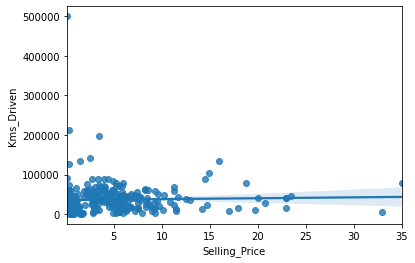

In [26]:
sns.regplot('Selling_Price','Kms_Driven',data=final_dataset)

# Lesser the Kms driven higher the Selling Price

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

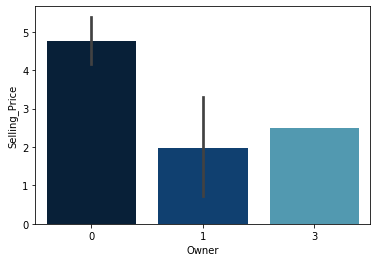

In [27]:
sns.barplot('Owner','Selling_Price',data=final_dataset,palette='ocean')

# Selling Price is high with less Owners used Cars

<AxesSubplot:xlabel='no_year', ylabel='Selling_Price'>

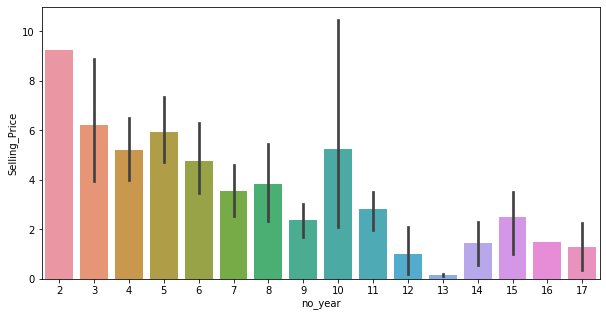

In [28]:
plt.figure(figsize=(10,5))
sns.barplot('no_year','Selling_Price',data=final_dataset)

# Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old

In [29]:
# get_dummies is a funt. which help us to convert all the things into one hot encodeing 
# and drop_first is used to drop the first column to escape from the dummy variable trap.

final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [30]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [31]:
# Checking Correlation, How one feature is correlated to other features

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


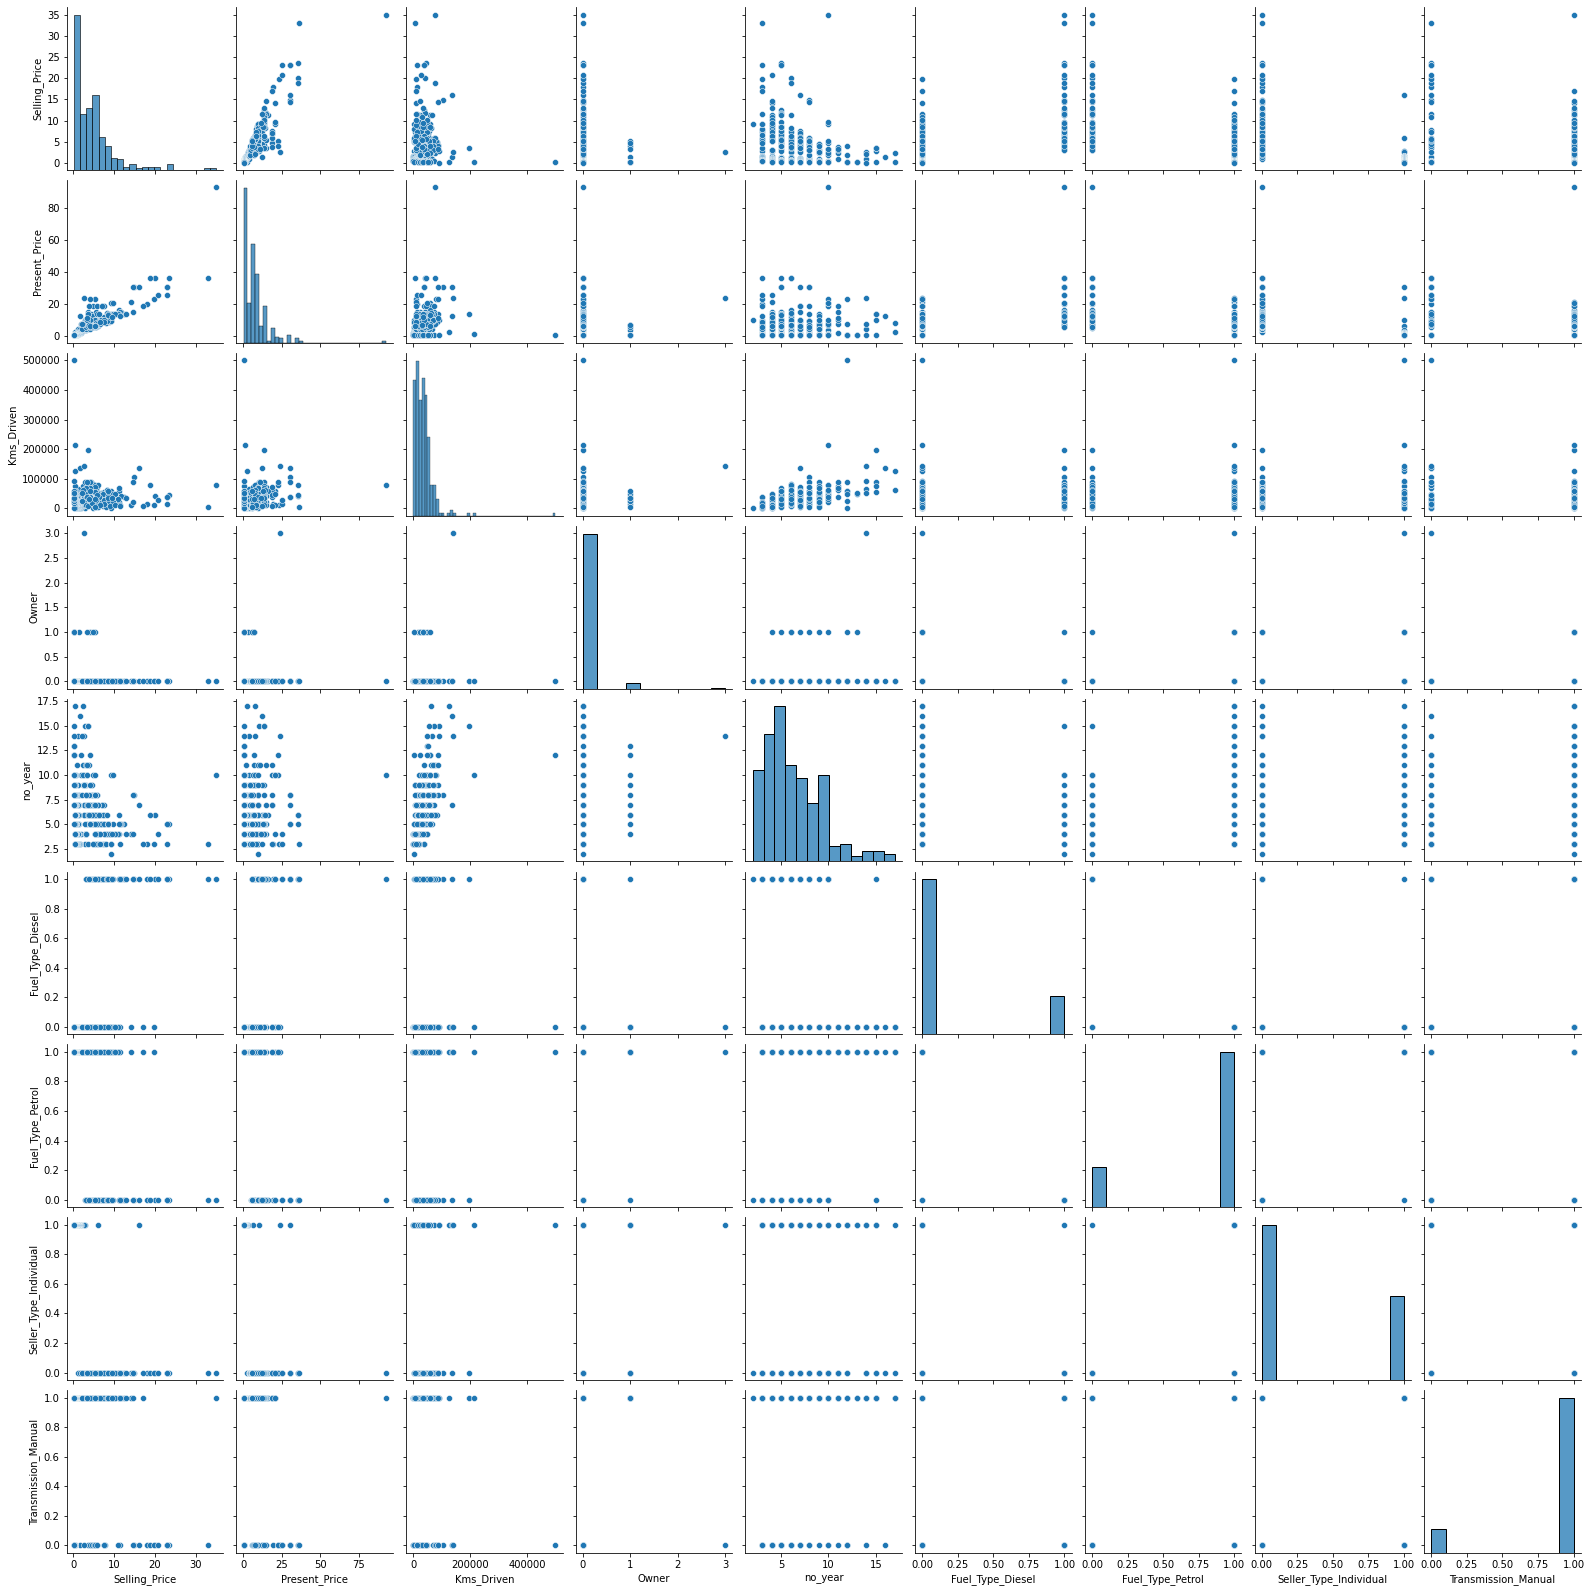

In [32]:
sns.pairplot(final_dataset)

Pairplot doesn't really give us much information regarding the features so let's plot a heatmap

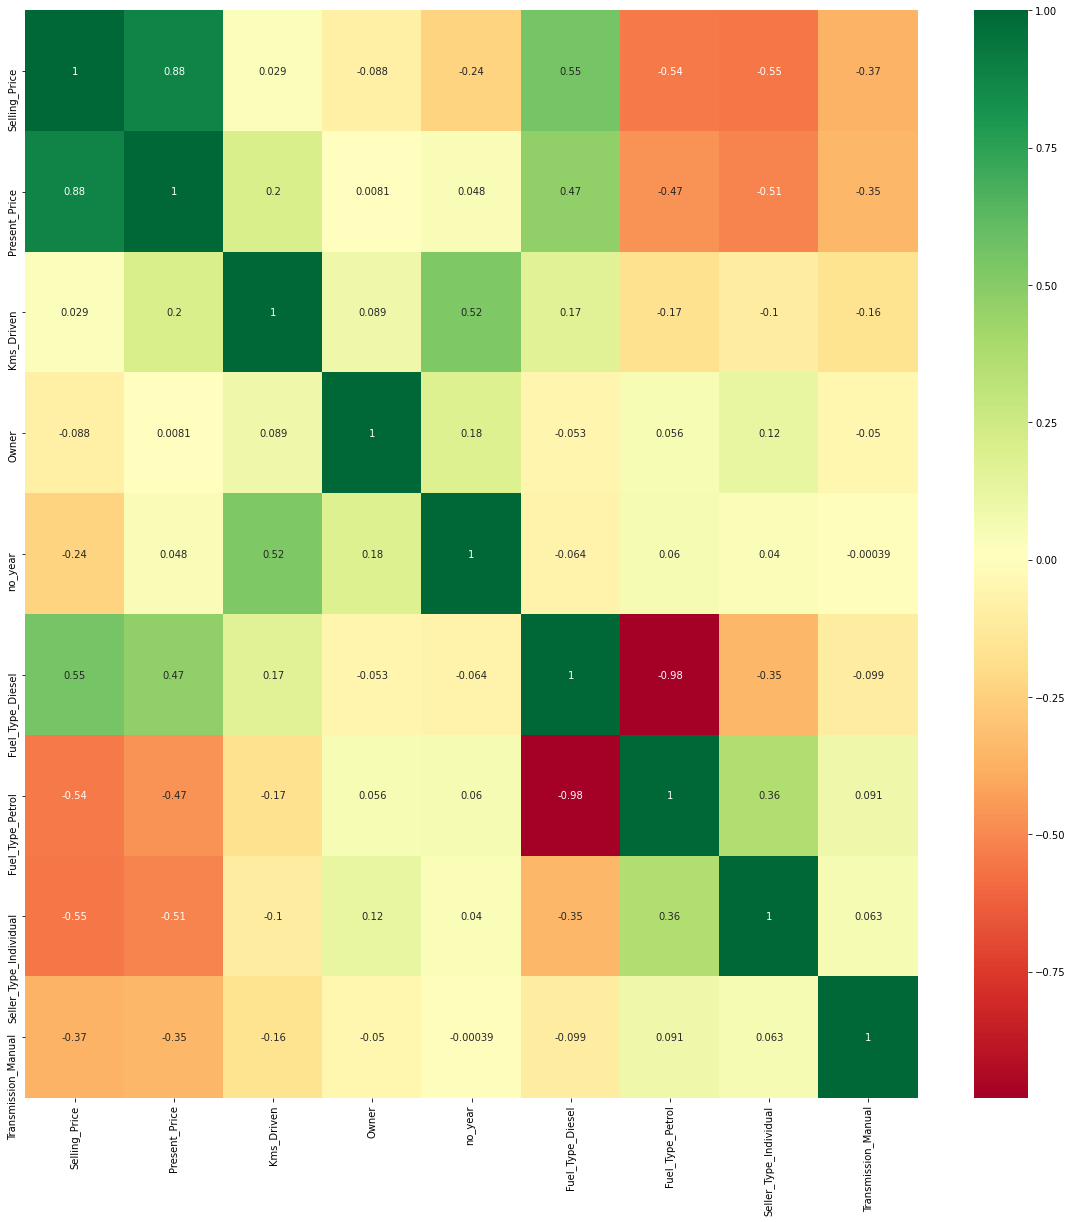

In [33]:
# Get correlations of each features in dataset

corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heatmap 
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn") # annot=True so that we can see the values

In [34]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Determining Independent(X) and Dependent(y) features

In [35]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [36]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [40]:
# Feature Importance 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [41]:
print(model.feature_importances_)

[0.38258386 0.04359787 0.00050091 0.07534631 0.2272478  0.00944545
 0.12403122 0.13724658]


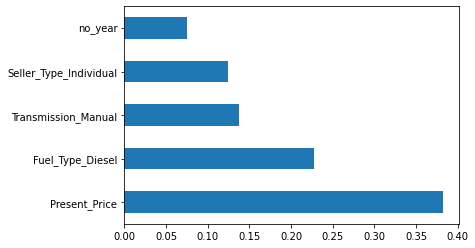

In [42]:
# Plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Spliting Training and Test data

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [44]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
# Train Accuracy

y_pred = rf_random.predict(X_test)
rf_random.score(X_train,y_train)

0.9854418698126836

In [48]:
# Test Accuracy

rf_random.score(X_test,y_test)

0.9485180728383212

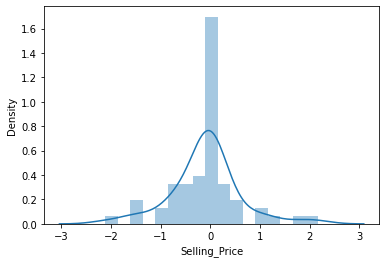

In [49]:
# Gaussian Distribution

sns.distplot(y_test-y_pred)
plt.show()

In [50]:
from sklearn import metrics
import numpy as np

### Performance metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4544704918032791
MSE: 0.4965078211475413
RMSE: 0.7046331110212898


### Hyperparameter Tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV is little bit faster then GridSearchCV

In [53]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid) # RandomizedSearchCV will select the best parameter out of this

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
regressor = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [59]:
regressor.best_score_

-4.5896590715714805

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 1000,min_samples_split= 2,min_samples_leaf= 1,
 max_features= 'sqrt',
max_depth= 25)
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [80]:
predictions = regressor.predict(X_test)

In [81]:
predictions # Prediction for the X_test data

array([ 0.67316, 10.12911,  4.10088,  2.72961,  4.15105,  2.39716,
        0.7861 ,  1.16825,  0.70672,  5.3546 ,  0.61538,  3.68716,
        4.43665,  0.92643,  4.51493,  1.1352 ,  0.684  ,  3.43092,
        3.09081,  8.9598 ,  3.14726,  6.98885,  4.76999,  1.1204 ,
        0.56475,  2.7438 ,  2.84813,  3.67056,  1.219  ,  1.4238 ,
        0.66413,  0.49931,  0.31764,  1.015  ,  5.28505,  4.11196,
        0.52451,  0.65895,  4.53088,  5.69759,  1.1186 ,  0.25157,
        5.08545,  7.0761 , 11.45577,  7.31268,  6.03039,  1.07104,
        0.56199,  3.89255,  8.07093,  0.60973, 15.86437,  7.17042,
        6.23694,  4.76912,  6.23304,  7.02357,  5.96   ,  0.45827,
        7.50062])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

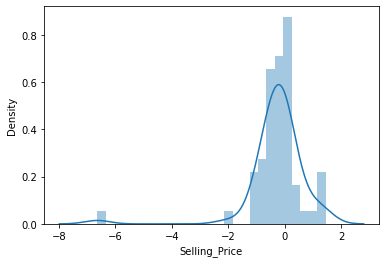

In [82]:
sns.distplot(y_test-predictions) 
# y_test = Actual Value, It should be minimal. Since it is minimal we are getting this close Gaussian Distribution graph
# That means difference is very minimal 
# It is forming a normal distribution

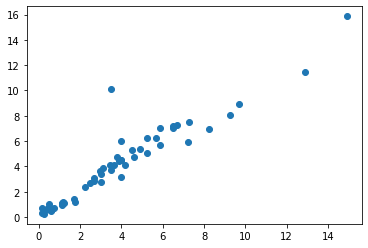

In [83]:
plt.scatter(y_test,predictions) # It is linear. That means prediction is pretty much good

### Performance metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))   # after applying Hyperparameter tuning
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.555274262295082
MSE: 1.103872892867215
RMSE: 1.05065355511092


### Saving the model

In [85]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(regressor, file)

In [86]:
model = open('random_forest_regression_model.pkl','rb')
forest = pickle.load(model)